In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('BEL.NS.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715
1,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024
2,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231
3,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257
4,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       498 non-null    object 
 1   Open       498 non-null    float64
 2   High       498 non-null    float64
 3   Low        498 non-null    float64
 4   Close      498 non-null    float64
 5   Adj Close  498 non-null    float64
 6   Volume     498 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.4+ KB


In [5]:
data = data.set_index(pd.DatetimeIndex(data['Date']).values)
data

,Date,Open,High,Low,Close,Adj Close,Volume
2020-07-20,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715
2020-07-21,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024
2020-07-22,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231
2020-07-23,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257
2020-07-24,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977
...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,235.800003,238.399994,233.800003,234.750000,234.750000,3363522
2022-07-12,2022-07-12,233.500000,236.800003,230.199997,232.250000,232.250000,4317958
2022-07-13,2022-07-13,231.899994,235.300003,231.000000,233.449997,233.449997,4288773
2022-07-14,2022-07-14,234.000000,237.949997,233.649994,237.399994,237.399994,5626408


In [6]:
def sma(data,column = 'Close',period = 20):
    return data[column].rolling(window=period).mean()

def ema(data,column = 'Close',period = 20):
    return data[column].ewm(span=period,adjust =False).mean()

def MACD(data, column='Close', fast=20, slow=40):
    fastMA = ema(data,column = column, period= fast)
    slowMA = ema(data,column = column, period = slow)
    return fastMA - slowMA

def BBUpper(data):
    basis = sma(data, period =20)
    std = data['Close'].rolling(window = 20).std()
    BBUpper = basis + 2*std
    return BBUpper

def BBLower(data):
    basis = sma(data, period=20)
    std = data['Close'].rolling(window=20).std()
    return basis - 2*std


In [7]:
trend1 = MACD(data)
trend1

2020-07-20    0.000000
2020-07-21    0.116144
2020-07-22    0.152843
2020-07-23    0.397423
2020-07-24    0.589808
                ...   
2022-07-11    0.283830
2022-07-12    0.189525
2022-07-13    0.163233
2022-07-14    0.323354
2022-07-15    0.835963
Name: Close, Length: 498, dtype: float64

In [8]:
trend = trend1.diff()
trend

2020-07-20         NaN
2020-07-21    0.116144
2020-07-22    0.036699
2020-07-23    0.244579
2020-07-24    0.192385
                ...   
2022-07-11    0.026909
2022-07-12   -0.094304
2022-07-13   -0.026292
2022-07-14    0.160121
2022-07-15    0.512609
Name: Close, Length: 498, dtype: float64

In [9]:
trendU = trend.copy()*150
trendD = trend.copy()*150
trendD

2020-07-20          NaN
2020-07-21    17.421603
2020-07-22     5.504917
2020-07-23    36.686905
2020-07-24    28.857787
                ...    
2022-07-11     4.036276
2022-07-12   -14.145665
2022-07-13    -3.943869
2022-07-14    24.018160
2022-07-15    76.891382
Name: Close, Length: 498, dtype: float64

In [10]:
trendU[trendU<0] = 0
trendU

2020-07-20          NaN
2020-07-21    17.421603
2020-07-22     5.504917
2020-07-23    36.686905
2020-07-24    28.857787
                ...    
2022-07-11     4.036276
2022-07-12     0.000000
2022-07-13     0.000000
2022-07-14    24.018160
2022-07-15    76.891382
Name: Close, Length: 498, dtype: float64

In [11]:
trendD[trendD>0] = 0 
trendD

2020-07-20          NaN
2020-07-21     0.000000
2020-07-22     0.000000
2020-07-23     0.000000
2020-07-24     0.000000
                ...    
2022-07-11     0.000000
2022-07-12   -14.145665
2022-07-13    -3.943869
2022-07-14     0.000000
2022-07-15     0.000000
Name: Close, Length: 498, dtype: float64

In [12]:
data['MACD'] = MACD(data)
data['TrendUp'] = trendU
data['TrendDown'] = trendD

In [13]:
exline = BBUpper(data) - BBLower(data)
data['ExplosiveLine'] = exline

In [14]:
data['deadzone'] = 20
data

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,TrendUp,TrendDown,ExplosiveLine,deadzone
2020-07-20,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715,0.000000,NaN,NaN,NaN,20
2020-07-21,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024,0.116144,17.421603,0.000000,NaN,20
2020-07-22,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231,0.152843,5.504917,0.000000,NaN,20
2020-07-23,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257,0.397423,36.686905,0.000000,NaN,20
2020-07-24,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977,0.589808,28.857787,0.000000,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,235.800003,238.399994,233.800003,234.750000,234.750000,3363522,0.283830,4.036276,0.000000,18.117386,20
2022-07-12,2022-07-12,233.500000,236.800003,230.199997,232.250000,232.250000,4317958,0.189525,0.000000,-14.145665,16.467768,20
2022-07-13,2022-07-13,231.899994,235.300003,231.000000,233.449997,233.449997,4288773,0.163233,0.000000,-3.943869,14.990820,20
2022-07-14,2022-07-14,234.000000,237.949997,233.649994,237.399994,237.399994,5626408,0.323354,24.018160,0.000000,15.612695,20


In [15]:
data['High-Low'] = data['High'] - data['Low']
data['High-Low']

2020-07-20    3.599999
2020-07-21    4.200005
2020-07-22    3.449997
2020-07-23    5.949997
2020-07-24    3.450005
                ...   
2022-07-11    4.599991
2022-07-12    6.600006
2022-07-13    4.300003
2022-07-14    4.300003
2022-07-15    9.300003
Name: High-Low, Length: 498, dtype: float64

In [16]:
data['CurrHigh - PrevClose'] = data['High'].shift() - data['Close']
data['CurrHigh - PrevClose']

2020-07-20         NaN
2020-07-21    0.650002
2020-07-22    2.900001
2020-07-23   -2.550003
2020-07-24    1.349998
                ...   
2022-07-11    7.699997
2022-07-12    6.149994
2022-07-13    3.350006
2022-07-14   -2.099991
2022-07-15   -7.550003
Name: CurrHigh - PrevClose, Length: 498, dtype: float64

In [17]:
data['CurrLow-PrevClose'] = data['Low'].shift() - data['Close']
data['CurrLow-PrevClose']

2020-07-20          NaN
2020-07-21    -2.949997
2020-07-22    -1.300004
2020-07-23    -6.000000
2020-07-24    -4.599999
                ...    
2022-07-11    -1.300003
2022-07-12     1.550003
2022-07-13    -3.250000
2022-07-14    -6.399994
2022-07-15   -11.850006
Name: CurrLow-PrevClose, Length: 498, dtype: float64

In [18]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,TrendUp,TrendDown,ExplosiveLine,deadzone,High-Low,CurrHigh - PrevClose,CurrLow-PrevClose
2020-07-20,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715,0.000000,NaN,NaN,NaN,20,3.599999,NaN,NaN
2020-07-21,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024,0.116144,17.421603,0.000000,NaN,20,4.200005,0.650002,-2.949997
2020-07-22,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231,0.152843,5.504917,0.000000,NaN,20,3.449997,2.900001,-1.300004
2020-07-23,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257,0.397423,36.686905,0.000000,NaN,20,5.949997,-2.550003,-6.000000
2020-07-24,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977,0.589808,28.857787,0.000000,NaN,20,3.450005,1.349998,-4.599999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,235.800003,238.399994,233.800003,234.750000,234.750000,3363522,0.283830,4.036276,0.000000,18.117386,20,4.599991,7.699997,-1.300003
2022-07-12,2022-07-12,233.500000,236.800003,230.199997,232.250000,232.250000,4317958,0.189525,0.000000,-14.145665,16.467768,20,6.600006,6.149994,1.550003
2022-07-13,2022-07-13,231.899994,235.300003,231.000000,233.449997,233.449997,4288773,0.163233,0.000000,-3.943869,14.990820,20,4.300003,3.350006,-3.250000
2022-07-14,2022-07-14,234.000000,237.949997,233.649994,237.399994,237.399994,5626408,0.323354,24.018160,0.000000,15.612695,20,4.300003,-2.099991,-6.399994


In [19]:
data['TrueRange'] = data[['High-Low','CurrHigh - PrevClose','CurrLow-PrevClose']].max(axis=1)

In [20]:
data['MinusDM'] = -data['High'].diff() -data['Low'].diff()

In [21]:
data['MinusDM'][data['MinusDM']<0] = 0
data

C:\Users\Prajjwal Kumar\AppData\Local\Temp\ipykernel_24148\2703766832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MinusDM'][data['MinusDM']<0] = 0


,Date,Open,High,Low,Close,Adj Close,Volume,MACD,TrendUp,TrendDown,ExplosiveLine,deadzone,High-Low,CurrHigh - PrevClose,CurrLow-PrevClose,TrueRange,MinusDM
2020-07-20,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715,0.000000,NaN,NaN,NaN,20,3.599999,NaN,NaN,3.599999,NaN
2020-07-21,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024,0.116144,17.421603,0.000000,NaN,20,4.200005,0.650002,-2.949997,4.200005,0.000000
2020-07-22,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231,0.152843,5.504917,0.000000,NaN,20,3.449997,2.900001,-1.300004,3.449997,0.950004
2020-07-23,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257,0.397423,36.686905,0.000000,NaN,20,5.949997,-2.550003,-6.000000,5.949997,0.000000
2020-07-24,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977,0.589808,28.857787,0.000000,NaN,20,3.450005,1.349998,-4.599999,3.450005,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,235.800003,238.399994,233.800003,234.750000,234.750000,3363522,0.283830,4.036276,0.000000,18.117386,20,4.599991,7.699997,-1.300003,7.699997,3.699997
2022-07-12,2022-07-12,233.500000,236.800003,230.199997,232.250000,232.250000,4317958,0.189525,0.000000,-14.145665,16.467768,20,6.600006,6.149994,1.550003,6.600006,5.199997
2022-07-13,2022-07-13,231.899994,235.300003,231.000000,233.449997,233.449997,4288773,0.163233,0.000000,-3.943869,14.990820,20,4.300003,3.350006,-3.250000,4.300003,0.699997
2022-07-14,2022-07-14,234.000000,237.949997,233.649994,237.399994,237.399994,5626408,0.323354,24.018160,0.000000,15.612695,20,4.300003,-2.099991,-6.399994,4.300003,0.000000


In [22]:
data['TrueRange14'] = data['TrueRange'].rolling(14).sum()
data['MinusDMI14'] = data['MinusDM'].rolling(14).sum()
data['MinusDI14'] = data['MinusDMI14'] / data['TrueRange14']*100

In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,TrendUp,TrendDown,ExplosiveLine,deadzone,High-Low,CurrHigh - PrevClose,CurrLow-PrevClose,TrueRange,MinusDM,TrueRange14,MinusDMI14,MinusDI14
2020-07-20,2020-07-20,98.000000,99.900002,96.300003,96.750000,91.560181,11345715,0.000000,NaN,NaN,NaN,20,3.599999,NaN,NaN,3.599999,NaN,NaN,NaN,NaN
2020-07-21,2020-07-21,97.599998,100.800003,96.599998,99.250000,93.926094,14173024,0.116144,17.421603,0.000000,NaN,20,4.200005,0.650002,-2.949997,4.200005,0.000000,NaN,NaN,NaN
2020-07-22,2020-07-22,99.900002,99.949997,96.500000,97.900002,92.648506,8900231,0.152843,5.504917,0.000000,NaN,20,3.449997,2.900001,-1.300004,3.449997,0.950004,NaN,NaN,NaN
2020-07-23,2020-07-23,98.000000,103.500000,97.550003,102.500000,97.001755,21328257,0.397423,36.686905,0.000000,NaN,20,5.949997,-2.550003,-6.000000,5.949997,0.000000,NaN,NaN,NaN
2020-07-24,2020-07-24,102.949997,104.650002,101.199997,102.150002,96.670532,22751977,0.589808,28.857787,0.000000,NaN,20,3.450005,1.349998,-4.599999,3.450005,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,235.800003,238.399994,233.800003,234.750000,234.750000,3363522,0.283830,4.036276,0.000000,18.117386,20,4.599991,7.699997,-1.300003,7.699997,3.699997,92.499955,34.550003,37.351373
2022-07-12,2022-07-12,233.500000,236.800003,230.199997,232.250000,232.250000,4317958,0.189525,0.000000,-14.145665,16.467768,20,6.600006,6.149994,1.550003,6.600006,5.199997,92.549973,34.100006,36.844966
2022-07-13,2022-07-13,231.899994,235.300003,231.000000,233.449997,233.449997,4288773,0.163233,0.000000,-3.943869,14.990820,20,4.300003,3.350006,-3.250000,4.300003,0.699997,93.599976,33.150009,35.416685
2022-07-14,2022-07-14,234.000000,237.949997,233.649994,237.399994,237.399994,5626408,0.323354,24.018160,0.000000,15.612695,20,4.300003,-2.099991,-6.399994,4.300003,0.000000,92.299988,33.150009,35.915507


C:\Users\Prajjwal Kumar\AppData\Local\Temp\ipykernel_24148\3321428859.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_size" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('plot.jpeg',bbox_size=[22,18])


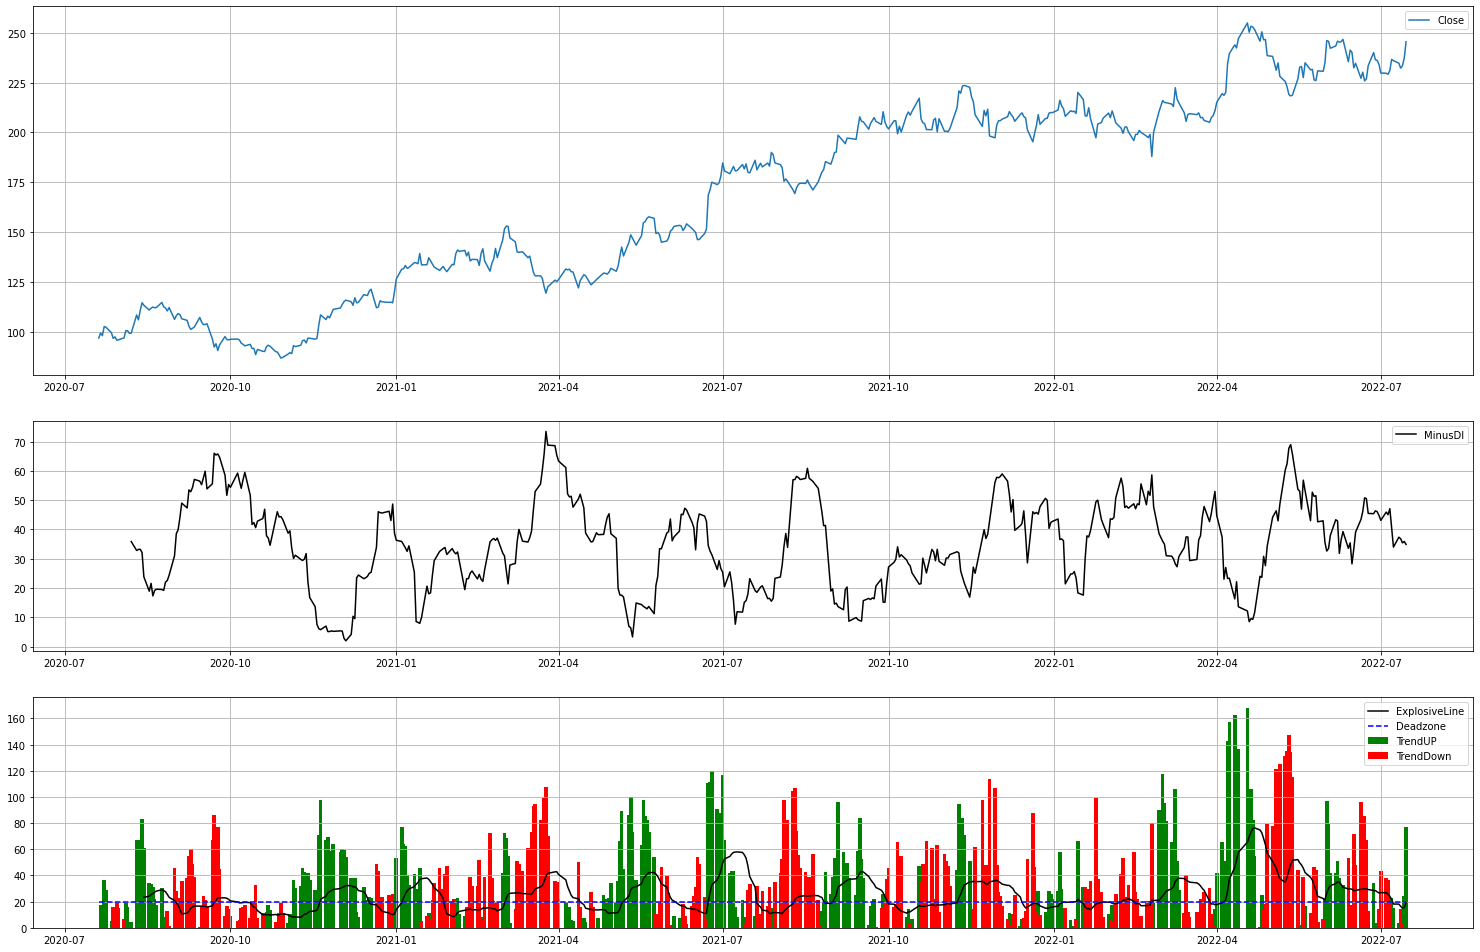

In [24]:
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_data = fig.add_axes((0, 0.72, 1, 0.32))
ax_WAE = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_data)
ax_MinusDI = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_data)
ax_WAE.bar(data.index,data['TrendUp'],color='green',label='TrendUP',width=2)
ax_WAE.bar(data.index,-1*data['TrendDown'],color='red',label='TrendDown',width=2)
ax_WAE.plot(data.index,data['ExplosiveLine'],color='black',label='ExplosiveLine')
ax_data.plot(data.index,data['Close'],label='Close')
ax_MinusDI.plot(data.index,data['MinusDI14'],label='MinusDI',color='black')
ax_WAE.plot(data.index,data['deadzone'],color = 'blue',label = 'Deadzone',ls = '--')
ax_MinusDI.legend()
ax_data.legend()
ax_WAE.legend()
ax_MinusDI.grid()
ax_data.grid()
ax_WAE.grid()
plt.savefig('plot.jpeg',bbox_size=[22,18])
plt.show()